In [1]:
import pandas as pd 
import numpy as np 

In [5]:
df = pd.read_csv('Neighborhood_zhvi_uc_sfrcondo_tier_0.33_0.67_sm_sa_month.csv')
df = df[df['City']=='New York']
df.head()

,RegionID,SizeRank,RegionName,RegionType,StateName,State,City,Metro,CountyName,2000-01-31,...,2022-06-30,2022-07-31,2022-08-31,2022-09-30,2022-10-31,2022-11-30,2022-12-31,2023-01-31,2023-02-28,2023-03-31
2,270958,2,Upper West Side,neighborhood,NY,NY,New York,"New York-Newark-Jersey City, NY-NJ-PA",New York County,236108.270706,...,1.502415e+06,1.503699e+06,1.485319e+06,1.450125e+06,1.419157e+06,1.385666e+06,1.352563e+06,1.324953e+06,1.314997e+06,1.317785e+06
3,270957,3,Upper East Side,neighborhood,NY,NY,New York,"New York-Newark-Jersey City, NY-NJ-PA",New York County,334521.434533,...,1.452183e+06,1.456090e+06,1.444789e+06,1.418873e+06,1.397560e+06,1.373576e+06,1.348029e+06,1.324022e+06,1.311994e+06,1.308355e+06
6,194430,6,East New York,neighborhood,NY,NY,New York,"New York-Newark-Jersey City, NY-NJ-PA",Kings County,132173.855361,...,5.578174e+05,5.607608e+05,5.620873e+05,5.610100e+05,5.598479e+05,5.580944e+05,5.554907e+05,5.550687e+05,5.542618e+05,5.546189e+05
7,272902,7,Bedford-Stuyvesant,neighborhood,NY,NY,New York,"New York-Newark-Jersey City, NY-NJ-PA",Kings County,112996.951123,...,9.717587e+05,9.745366e+05,9.737298e+05,9.637576e+05,9.565703e+05,9.507653e+05,9.461022e+05,9.392153e+05,9.312617e+05,9.243305e+05
11,198687,11,Washington Heights,neighborhood,NY,NY,New York,"New York-Newark-Jersey City, NY-NJ-PA",New York County,126574.607006,...,6.100646e+05,6.116972e+05,6.080475e+05,6.003821e+05,5.944407e+05,5.855645e+05,5.767463e+05,5.702368e+05,5.699729e+05,5.727232e+05


In [10]:
df['perc_growth'] = (df['2023-03-31']/df['2000-01-31'] -1)
print(df['perc_growth'].mean())

display(df[['RegionName','CountyName','perc_growth']].nlargest(30, 'perc_growth'))

3.367303211033217


,RegionName,CountyName,perc_growth
1613,Red Hook,Kings County,18.907400
456,Oakland Gardens,Queens County,17.018084
458,Clinton Hill,Kings County,12.454773
6097,Little Italy,New York County,10.627022
1409,Cobble Hill,Kings County,9.171477
1436,SoHo,New York County,8.914155
259,Greenpoint,Kings County,8.654328
1532,Hudson Yards,New York County,7.874878
7,Bedford-Stuyvesant,Kings County,7.180137
15,Williamsburg,Kings County,7.052690


In [11]:
print(df.groupby('CountyName')['perc_growth'].mean())

CountyName
Bronx County       1.978833
Kings County       4.848616
New York County    4.940983
Queens County      2.972709
Richmond County    2.325832
Name: perc_growth, dtype: float64


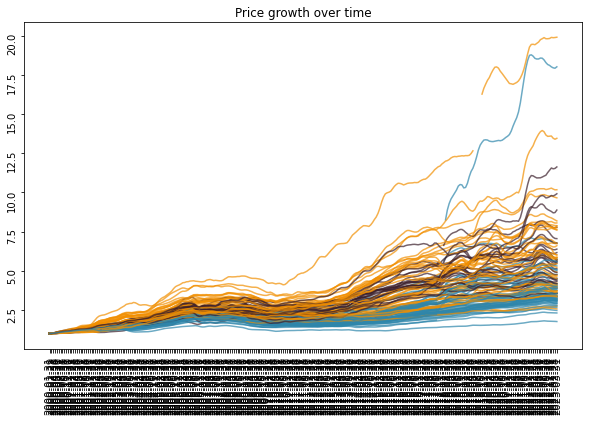

In [27]:
import matplotlib.pyplot as plt

#Plot improvement over time by age by transposing the DF
df = df[df["CountyName"].str.contains("Bronx County|Richmond County") == False]

dft = df.set_index('RegionName')
dft = dft.filter(regex='^20')
dft = dft.transpose()
#dft = dft.iloc[::-1, :]
dft = dft.div(dft.iloc[0])

fig, axs = plt.subplots(figsize=(10, 6))

#Get a list of names for the older riders (Over 27)
area_to_boro = df.set_index('RegionName')['CountyName'].to_dict()


color_choose = {'Bronx County': "#ffffff",'Kings County':"#F18F01",'New York County':"#3B1F2B",'Queens County': "#2E86AB", 'Richmond County':"#ffffff"}

for col in dft.columns:
    if col in area_to_boro:
        cplot = color_choose[area_to_boro[col]]
        axs.plot(dft[col], label=col,color=cplot,alpha=.7)
        axs.tick_params(rotation=90)
        axs.set_title('Price growth over time')
      
